# Clustering the Spotify Top 100

data source [kaggle](https://www.kaggle.com/jsongunsw/spotify-datasets)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans,DBSCAN

%matplotlib inline

import os

## Data Pre-processing

In [ ]:
# Read in the data
data = pd.read_csv("featuresdf.csv")
data.head(2)

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.581,0.0,0.0931,0.931,95.977,233713.0,4.0
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.229,0.0,0.0924,0.813,88.931,228827.0,4.0


In [ ]:
# Create feature matrix
song_features = ["energy", "liveness","key","tempo", "valence", "loudness", "speechiness", "acousticness", "danceability", "instrumentalness"]
X = data[song_features].values

# Normalise features
scaler = MinMaxScaler() 
X = scaler.fit_transform(X)

## Dimensionality Reduction

### PCA

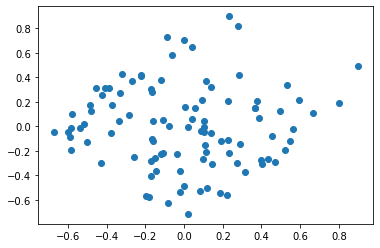

In [ ]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:,0],X_pca[:,1])

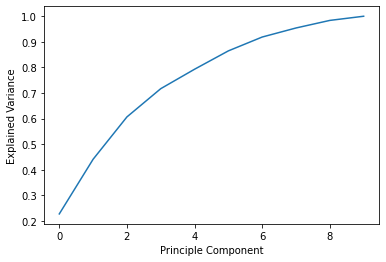

In [ ]:
explainedVariance = pca.explained_variance_ratio_.cumsum()
plt.plot(range(len(explainedVariance)),explainedVariance)

plt.xlabel("Principle Component")
plt.ylabel("Explained Variance")

plt.show()

In [ ]:
explainedVariance

array([0.2271843 , 0.44090252, 0.60638371, 0.71683482, 0.79284701,
       0.86464786, 0.91874312, 0.95414202, 0.98372546, 1.        ])

## Clustering

In [ ]:
kmeans = KMeans(n_clusters=5).fit(X_pca)
centroids = kmeans.cluster_centers_

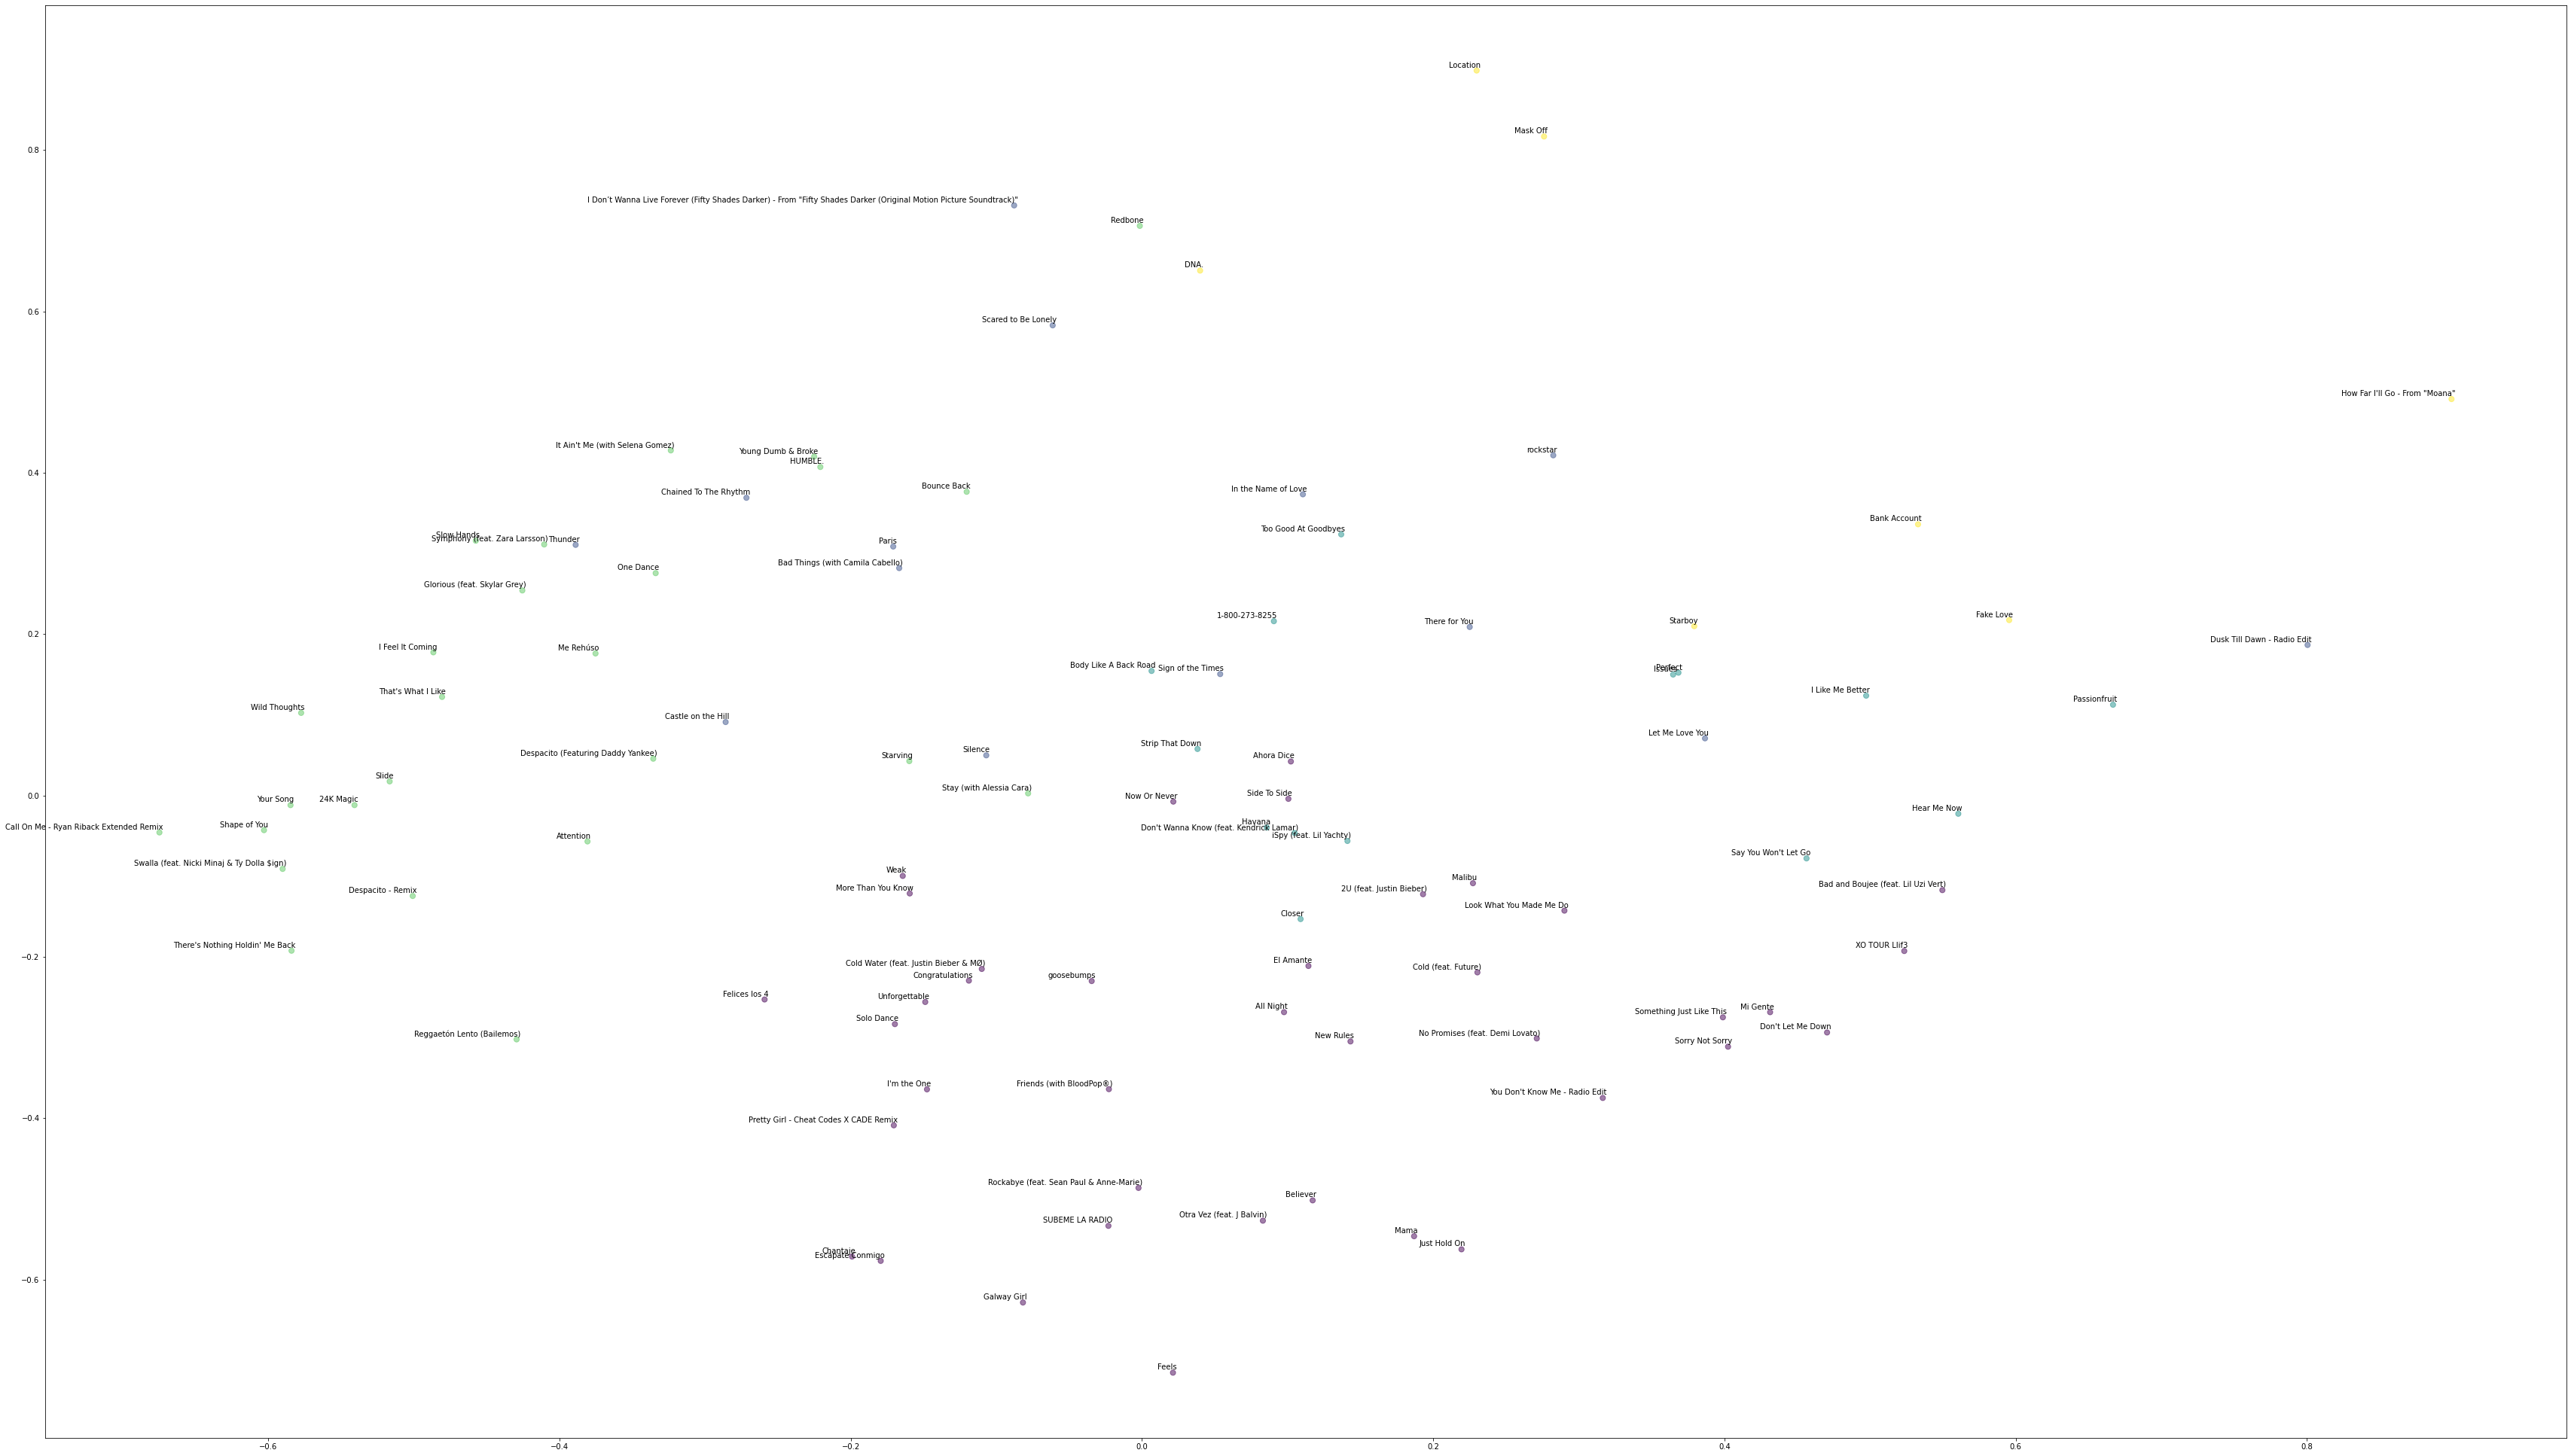

In [ ]:
plt.figure(figsize=(60, 35))
plt.scatter(X_pca[:,0],X_pca[:,1], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
#plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
labels = data.name
for i, label in enumerate(labels): #get (0, label)
        x = X_pca[i,0]
        y = X_pca[i,1]
        #x, y = X_pca[i] #2 dim
        plt.annotate(label,
                xy=(x, y), #show point 
                xytext=(5, 2), #show annotate
                textcoords='offset points',
                ha='right',
                va='bottom')        
plt.show()

In [ ]:
data['group'] = kmeans.labels_.astype(int)
data.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,group
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0,3
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0,4.0,3
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0,4.0,3
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0,4.0,0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600.0,4.0,0


In [ ]:
data[data.group == 4][['name','artists']]

,name,artists
14,Mask Off,Future
31,Starboy,The Weeknd
46,Location,Khalid
51,Fake Love,Drake
60,DNA.,Kendrick Lamar
66,"How Far I'll Go - From ""Moana""",Alessia Cara
94,Bank Account,21 Savage
